<a href="https://colab.research.google.com/github/OdysseusPolymetis/digital_classics_course/blob/main/4_counter_latin_grec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from collections import Counter

In [ ]:
!pip install stanza

In [4]:
catilinaires="Quousque tandem abutere, Catilina, patientia nostra ? Quamdiu etiam furor iste tuus nos eludet ? Quem ad finem sese effrenata jactabit audacia ? Nihilne te nocturnum praesidium Palatii, nihil urbis vigiliae, nihil timor populi, nihil concursus bonorum omnium, nihil hic munitissimus habendi senatus locus, nihil horum ora vultusque moverunt ? Patere tua consilia non sentis ? Constrictam jam horum omnium scientia teneri conjurationem tuam non vides ? Quid proxima, quid superiore nocte egeris, ubi fueris, quos convocaveris, quid consilii ceperis, quem nostrum ignorare arbitraris ? O tempora ! O mores ! Senatus haec intellegit, consul videt. Hic tamen vivit."

In [ ]:
import stanza
import string
stanza.download('la', package="perseus")

In [ ]:
nlp_stanza = stanza.Pipeline(lang='la', package="perseus", processors='tokenize,pos,lemma')
catilinaires_analyzed=nlp_stanza(catilinaires)

In [7]:
forms=list()
lemmas=list()
for sent in catilinaires_analyzed.sentences:
  for token in sent.words:
    if token.text not in string.punctuation:
      forms.append(token.text)
      lemmas.append(token.lemma)

In [ ]:
lemmas

In [9]:
catilinaires_counter_forms=Counter(forms)
catilinaires_counter_lemmas=Counter(lemmas)

In [ ]:
catilinaires_counter_forms

In [11]:
catilinaires_counter_forms['abutere']

1

In [ ]:
catilinaires_counter_lemmas

In [13]:
unique_lemmas=set(lemmas)

In [14]:
print(len(unique_lemmas))

70


## **Avec vos propres textes**

Sur vos propres textes maintenant, la même chose. Importez votre texte dans la fenêtre de gauche, et changez le nom dans le chemin ci-dessous.

In [7]:
def batch_process(text, nlp, batch_size=50):
    paragraphs = text.split('\n')
    batches = [paragraphs[i:i + batch_size] for i in range(0, len(paragraphs), batch_size)]

    words = []

    for batch in batches:
        batch_text = '\n'.join(batch)
        doc = nlp(batch_text)
        for sentence in doc.sentences:
            for word in sentence.words:
                token={}
                if word.lemma is not None:
                    token["word"]=word.text
                    token["lemma"]=word.lemma
                    token["pos"]=word.pos
                    words.append(token)

    return words

In [ ]:
!wget https://raw.githubusercontent.com/OdysseusPolymetis/philo_num_grenoble_24/main/catilinaires.txt

In [17]:
filepath_of_text = "/content/catilinaires.txt"

In [18]:
full_text = open(filepath_of_text, encoding="utf-8").read()

In [19]:
latin_analyzed = batch_process(full_text, nlp_stanza)

In [20]:
print(latin_analyzed[5:15])

[{'word': 'Catilina', 'lemma': 'Catilina', 'pos': 'PROPN'}, {'word': ',', 'lemma': ',', 'pos': 'PUNCT'}, {'word': 'patientia', 'lemma': 'patientia', 'pos': 'NOUN'}, {'word': 'nostra', 'lemma': 'noster', 'pos': 'DET'}, {'word': '?', 'lemma': '?', 'pos': 'PUNCT'}, {'word': 'quam', 'lemma': 'quam', 'pos': 'ADV'}, {'word': 'diu', 'lemma': 'diu', 'pos': 'ADV'}, {'word': 'etiam', 'lemma': 'etiam', 'pos': 'ADV'}, {'word': 'furor', 'lemma': 'furor', 'pos': 'NOUN'}, {'word': 'iste', 'lemma': 'iste', 'pos': 'DET'}]


In [21]:
forms = []
lemmas = []

for token in latin_analyzed:
    form = token["word"]
    lemma = token["lemma"]

    if lemma not in string.punctuation:
        forms.append(form)
        lemmas.append(lemma)

In [22]:
catilinaires_counter_forms=Counter(forms)
catilinaires_counter_lemmas=Counter(lemmas)

In [ ]:
catilinaires_counter_forms

In [24]:
nb_forms=len(forms)

In [25]:
nb_forms

3630

In [26]:
nb_unique_lemmas=len(set(lemmas))

In [27]:
nb_unique_lemmas

1119

# **Testons sur quelque chose de plus large**

In [5]:
!git clone https://github.com/cltk/lat_text_latin_library.git

Cloning into 'lat_text_latin_library'...
remote: Enumerating objects: 3812, done.
remote: Total 3812 (delta 0), reused 0 (delta 0), pack-reused 3812
Receiving objects: 100% (3812/3812), 107.32 MiB | 27.65 MiB/s, done.
Resolving deltas: 100% (1416/1416), done.


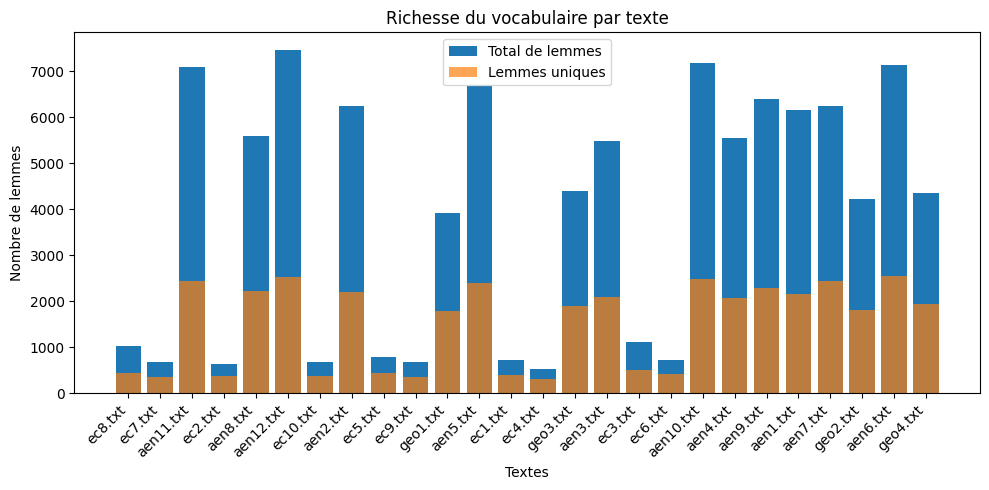

In [10]:
import os
import matplotlib.pyplot as plt

dossier = "/content/lat_text_latin_library/vergil"
fichiers = [f for f in os.listdir(dossier) if f.endswith('.txt')]

resultats = []
for fichier in fichiers:
    with open(os.path.join(dossier, fichier), 'r', encoding='utf-8') as f:
        texte = f.read()

    # Lemmatisation
    lemmes = batch_process(texte, nlp_stanza)

    # Calcul de la richesse du vocabulaire
    total_lemmes = len(lemmes)
    uniques_lemmes = len(set([lemme["lemma"] for lemme in lemmes]))

    resultats.append((fichier, total_lemmes, uniques_lemmes))

fichiers, totals, uniques = zip(*resultats)
index = range(len(fichiers))

plt.figure(figsize=(10, 5))
plt.bar(index, totals, label='Total de lemmes')
plt.bar(index, uniques, label='Lemmes uniques', alpha=0.7)
plt.xlabel('Textes')
plt.ylabel('Nombre de lemmes')
plt.xticks(index, fichiers, rotation=45, ha='right')
plt.legend()
plt.title('Richesse du vocabulaire par texte')
plt.tight_layout()
plt.show()

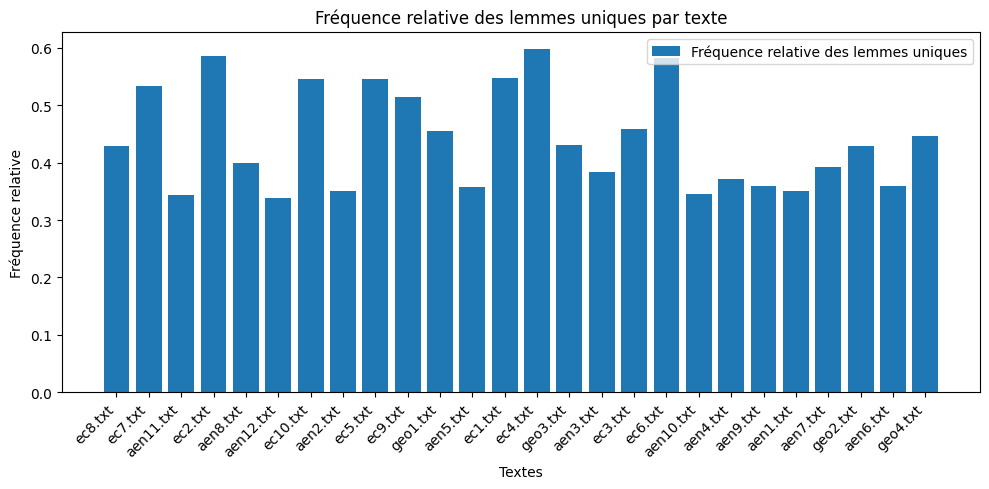

In [11]:
import os
import matplotlib.pyplot as plt

dossier = "/content/lat_text_latin_library/vergil"
fichiers = [f for f in os.listdir(dossier) if f.endswith('.txt')]

resultats = []
for fichier in fichiers:
    with open(os.path.join(dossier, fichier), 'r', encoding='utf-8') as f:
        texte = f.read()

    # Lemmatisation
    lemmes = batch_process(texte, nlp_stanza)

    # Calcul de la richesse du vocabulaire
    total_lemmes = len(lemmes)
    uniques_lemmes = len(set([lemme["lemma"] for lemme in lemmes]))

    resultats.append((fichier, total_lemmes, uniques_lemmes))

frequences_relatives = [uniques / total if total > 0 else 0 for _, total, uniques in resultats]

# Visualisation des résultats
fichiers = [r[0] for r in resultats]
index = range(len(fichiers))

plt.figure(figsize=(10, 5))

# Barres pour la fréquence relative des lemmes uniques
plt.bar(index, frequences_relatives, label='Fréquence relative des lemmes uniques')

plt.xlabel('Textes')
plt.ylabel('Fréquence relative')
plt.xticks(index, fichiers, rotation=45, ha='right')
plt.legend()
plt.title('Fréquence relative des lemmes uniques par texte')
plt.tight_layout()
plt.show()